In [42]:
import numpy as np
import pandas as pd
import random
from collections import defaultdict
import gym
import gym_minigrid
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
# mode = "Q-learning"
mode = "SARSA"

In [44]:
class QLearning:
    def __init__(self, actions, agent_indicator=10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.01
        self.gamma = 0.1 # change gamma here
        self.epsilon = 0.2
        self.q_values = defaultdict(lambda: [0.0] * actions)
        
    def _convert_state(self, s):
        return np.where(s == self.agent_indicator)[0][0]
        
    def update(self, state, action, reward, next_state, next_action):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)
        
        q_value = self.q_values[state][action]
        
        ########################## Write Code ####################################
        if mode == "Q-learning":
            next_q_value = max(self.q_values[next_state])
        elif mode == "SARSA":
            next_q_value = self.q_values[next_state][next_action]
        
        td_error = reward + self.gamma * next_q_value - q_value
        self.q_values[state][action] = q_value + self.alpha * td_error
        ###########################################################################
    def act(self, state):
        #################### Write epsilion greedy code ###########################
        if np.random.rand() < self.epsilon:
            action = random.randrange(self.actions)
        else:
            state = self._convert_state(state)
            q_values = self.q_values[state]
            action = np.argmax(q_values)
        ###########################################################################
        return action

In [45]:
from utils import gen_wrapped_env, show_video

In [46]:
env = gen_wrapped_env('MiniGrid-Empty-6x6-v0')
# env = gen_wrapped_env('MiniGrid-DoorKey-5x5-v0')

obs = env.reset()

agent_position = obs[0]

agent = QLearning(4, agent_position)

In [47]:
rewards = []
for ep in range(200000):
    done = False
    obs = env.reset()
    action = agent.act(obs)
    
    ep_rewards = 0
    while not done:
        next_obs, reward, done, info = env.step(action)

        next_action = agent.act(next_obs)

        agent.update(obs, action, reward, next_obs, next_action)
        
        ep_rewards += reward
        obs = next_obs
        action = next_action
    rewards.append(ep_rewards)
    if (ep+1) % 100 == 0:
        print("episode: {}, rewards: {}".format(ep+1, ep_rewards))
env.close()

episode: 100, rewards: 0
episode: 200, rewards: 0
episode: 300, rewards: 0
episode: 400, rewards: 0
episode: 500, rewards: 0
episode: 600, rewards: 0
episode: 700, rewards: 0
episode: 800, rewards: 0
episode: 900, rewards: 0
episode: 1000, rewards: 0
episode: 1100, rewards: 0
episode: 1200, rewards: 0
episode: 1300, rewards: 0
episode: 1400, rewards: 0
episode: 1500, rewards: 0
episode: 1600, rewards: 0
episode: 1700, rewards: 0
episode: 1800, rewards: 0
episode: 1900, rewards: 0
episode: 2000, rewards: 0
episode: 2100, rewards: 0
episode: 2200, rewards: 0
episode: 2300, rewards: 0
episode: 2400, rewards: 0
episode: 2500, rewards: 0
episode: 2600, rewards: 0
episode: 2700, rewards: 0
episode: 2800, rewards: 0
episode: 2900, rewards: 0
episode: 3000, rewards: 0
episode: 3100, rewards: 0
episode: 3200, rewards: 0
episode: 3300, rewards: 0
episode: 3400, rewards: 0
episode: 3500, rewards: 0
episode: 3600, rewards: 0
episode: 3700, rewards: 0
episode: 3800, rewards: 0
episode: 3900, reward

In [48]:
{s:np.round(q, 5).tolist() for s, q in agent.q_values.items()}

{0: [0.0, 0.0, 0.0, 0.0],
 12: [0.0, 0.0, 0.0, 0.0],
 24: [0.0, 0.0, 0.0, 0.0],
 36: [0.0, 0.0, 3e-05, 0.0],
 27: [6e-05, 6e-05, 0.00055, 6e-05],
 30: [0.00081, 0.00083, 0.00785, 0.00077],
 3: [0.0, 0.0, 0.0, 0.0],
 6: [0.0, 0.0, 0.0, 0.0],
 15: [0.0, 0.0, 1e-05, 0.0],
 9: [0.0, 0.0, 1e-05, 0.0],
 39: [0.00145, 0.00141, 0.01556, 0.00142],
 18: [1e-05, 2e-05, 0.00015, 1e-05],
 21: [0.00012, 0.00012, 0.00169, 0.00012],
 33: [0.0085, 0.00815, 0.20241, 0.00757],
 42: [0.02942, 0.03051, 0.23118, 0.03095],
 45: [0.0, 0.0, 0.0, 0.0]}

In [49]:
show_video()

In [50]:
if mode == "Q-learning":
    pd.Series(rewards).to_csv('./logs/rewards_qlearning.csv')
elif mode == "SARSA":
    pd.Series(rewards).to_csv('./logs/rewards_sarsa_gamma=0.1.csv')

In [51]:
sarsa_logs = pd.read_csv('./logs/rewards_sarsa_gamma=0.1.csv', index_col=False).iloc[:, 1]
q_logs = pd.read_csv('./logs/rewards_qlearning.csv', index_col=False).iloc[:, 1]

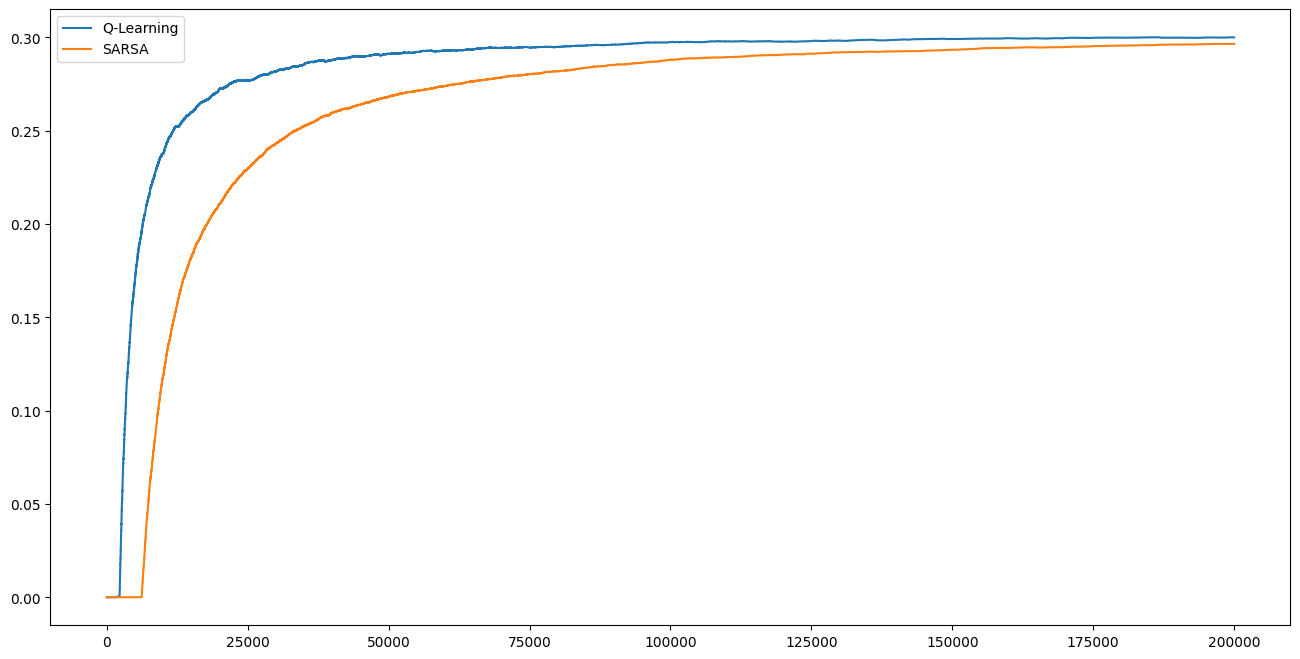

In [52]:
plt.figure(figsize=(16, 8))
plt.plot(q_logs.cumsum() / (pd.Series(np.arange(q_logs.shape[0]))+1), label="Q-Learning")
plt.plot(sarsa_logs.cumsum() / (pd.Series(np.arange(sarsa_logs.shape[0]))+1), label="SARSA")
plt.legend()
plt.show()